<a href="https://colab.research.google.com/github/DeusExMachina1993/Deep-Computer-Vision/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2: Develop a Deep CNN for MNIST dataset classification and train it from scratch

**MNIST** **Dataset**
The MNIST dataset consists of images of hand-written digits. Each image has a resolution of 28 x 28 pixels and a single color channel (grayscale). The dataset consists of 60,000 training images and 10,000 test images. The NIST dataset is the parent of the MNIST dataset - in other words, the MNIST is a subset of the NIST dataset. 

![alt text](https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/mnist.png)

##**What is a Convolutional Neural Network?**

A convolution in CNN is nothing but a element wise multiplication i.e. dot product of the image matrix and the filter.
![alt text](https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/convolution.gif)

Convolutional Neural Networks (CNNs) are the current state-of-art architecture for image classification task. Whether it is facial recognition, self driving cars or object detection, CNNs are being used everywhere. In this post, a simple 2-D Convolutional Neural Network (CNN) model is designed using keras with tensorflow backend for the well known MNIST digit recognition task. The whole work flow can be:


1.   Preparing the data
2.   Building and compiling of the model
3.   Training and evaluating the model









###1. **Prepare** **dataset**



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

###2. **Define model**

In [40]:
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

###3. **Data Augmentation**

Data augmentation is all about fabricating more data from the data you actually got – adding variance without losing the information the data carries. Doing this reduces the risk of overfitting and generally the accuracy on unseen data can be improved.

In the specific case of images as input data (as is the case in the MNIST dataset) augmentation can for instance be:




*   Affine transformations (rotation, rescaling, translations etc.)
*   Elastic distortions
*   Convolutional filters (for instance, and in the MNIST case, making digits thicker or thinner by using max- or min-kernels)
*   Adding noise




In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

###4. **Train**

In [44]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
937/937 [==============================] - 232s 248ms/step - loss: 0.1251 - acc: 0.9606 - val_loss: 0.0462 - val_acc: 0.9869
Epoch 2/5
937/937 [==============================] - 230s 245ms/step - loss: 0.0523 - acc: 0.9838 - val_loss: 0.0353 - val_acc: 0.9893
Epoch 3/5
937/937 [==============================] - 228s 244ms/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9930
Epoch 4/5
937/937 [==============================] - 228s 243ms/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 5/5
937/937 [==============================] - 229s 244ms/step - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0259 - val_acc: 0.9911


###Part2: **VGG16---CIFAR10**

The objective was to implement VGG16 in any Deep Learning framework and to edit the architecture to include Dropout layers, Batch Normalization other and small tweaks to perform image classification on CIFAR10 dataset.

VGG16 is a deep learning model which improves the performance by focusing on increasing the depth of the network by stacking a large number of convolution filters of small size together.

In VGG16, filters of receptive field 3 × 3 are used, comparatively very small to the filters used by the previous models. Instead of using a 7 × 7 filter, three 3 × 3 filters are used which decrease the trainable parameters and effectively covers the same receptive field. With a convolution stride of 1 px, the padding used is ‘same’. Max Pooling is performed over 2 × 2 px with a stride of 2.

There are 16 weight layers and 5 max pool layers in the original architecture. Input image is of 224 × 224 dimensions and there are 138 million trainable parameters.

The same was implemented in Keras with tensorflow backend. BatchNormalization and Dropout layers are added after each MaxPooling operation. Dense layers are changed to have 4096,512 and 10 neurons respectively.

ADAM is used as an optimizer with initial learning rate 1e-3. Categorical Crossentropy is used as the loss function and accuracy as a metric.

A learning rate scheduler is added which decreases the learning rate by a factor of 10 if the validation accuracy has not increased compared to it’s n-3rd run and if learning rate has not been decreased in the last 3 epochs.

In [0]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K

In [46]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [47]:
print("x_train shape" + str(x_train.shape))
print("y_train shape" + str(y_train.shape))

x_train shape(50000, 32, 32, 3)
y_train shape(50000, 1)


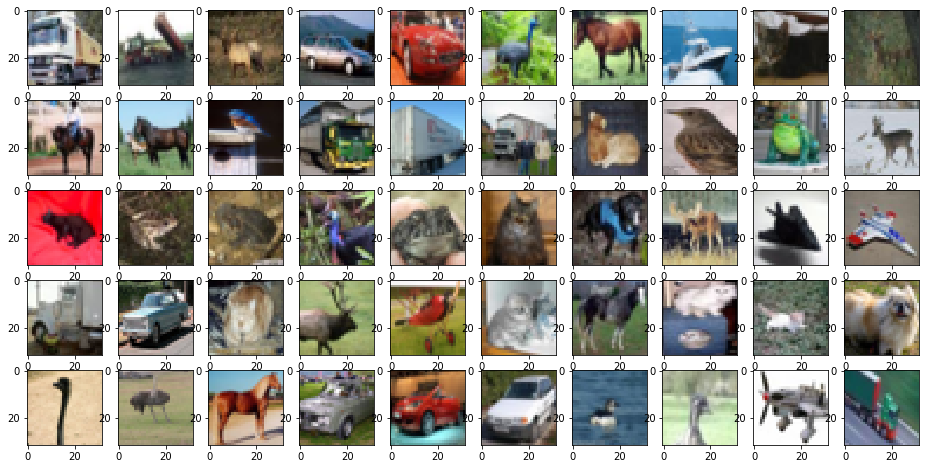

In [48]:

fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [0]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
sgd = SGD(lr=1e-3, decay=5e-4, momentum=0.9, nesterov=True)

adam = Adam(lr=1e-3)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [0]:
min_epochs = 3  # After this number, user will be asked whether to run another epoch or not
factor = 10 # Factor by which learning rate should be decreased
e_red = 0

# Learning Rate Scheduler
def scheduler(epoch):
  n = K.eval(model.optimizer.lr)
  if i == 'R' or i == 'r':
    n /= factor
  return n

change_lr = LearningRateScheduler(scheduler)
callbacks_list = [change_lr]

  
count = 1
flag = 1
i = 'y'
val = []
train = []

while flag==1:

  print("\n\nINFO: Training epoch number: " + str(count) + " with learning rate: " + str(K.eval(model.optimizer.lr)) + "\n")

  history = model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1,validation_split=0.1,callbacks=callbacks_list)
  
  
  # Appending validation accuracy to list to check whether lr needs to be reduced
  val.append(history.history['val_acc'])
  train.append(history.history['acc'])

  # To decrease learning rate
  if len(val) > 3:
    if val[len(val)-1][0] - val[len(val)-4][0] < 0.01 and count - e_red > 2: 
      print("INFO: Reducing learning rate by factor of 10 after the next epoch")
      # Setting the parameter for scheduler
      i = 'r'
      e_red = count
    else:
      i = 'n'

  # Checking if another epoch needs to be run
  if count > min_epochs:
    print("Type y for running another epoch")
    print("Type n to stop the training")
    inp = input()
    if inp == 'y' or inp == 'Y':
      flag = 1
    elif inp == 'n' or inp == 'N':
      flag = 0

  #Increasing the epoch number
  count += 1

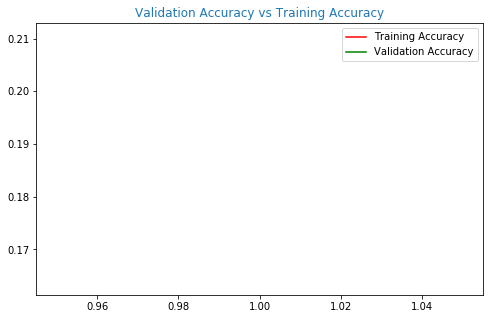

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Validation Accuracy vs Training Accuracy', color='C0')
ax.plot(range(1,len(train)+1),train[:len(train)],  label='Training Accuracy',color='red')
ax.plot(range(1,len(train)+1),val, label='Validation Accuracy', color='green')
ax.legend()

###Part3: **Cat vs. Dog Image Classification**

**Feature Extraction Using a Pretrained Model**

One thing that is commonly done in computer vision is to take a model trained on a very large dataset, run it on your own, smaller dataset, and extract the intermediate representations (features) that the model generates. These representations are frequently informative for your own computer vision task, even though the task may be quite different from the problem that the original model was trained on. This versatility and repurposability of convnets is one of the most interesting aspects of deep learning.

In our case, we will use the Inception V3 model developed at Google, and pre-trained on ImageNet, a large dataset of web images (1.4M images and 1000 classes). This is a powerful model; let's see what the features that it has learned can do for our cat vs. dog problem.

First, we need to pick which intermediate layer of Inception V3 we will use for feature extraction. A common practice is to use the output of the very last layer before the Flatten operation, the so-called "bottleneck layer." The reasoning here is that the following fully connected layers will be too specialized for the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottleneck features, however, retain much generality.

Let's instantiate an Inception V3 model preloaded with weights trained on ImageNet:

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [56]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-01-20 09:58:08--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  36.2MB/s    in 2.3s    

2020-01-20 09:58:11 (36.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

By specifying the include_top=False argument, we load a network that doesn't include the classification layers at the top—ideal for feature extraction.

Let's make the model non-trainable, since we will only use it for feature extraction; we won't update the weights of the pretrained model during training.

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

The layer we will use for feature extraction in Inception v3 is called mixed7. It is not the bottleneck of the network, but we are using it to keep a sufficiently large feature map (7x7 in this case). (Using the bottleneck layer would have resulting in a 3x3 feature map, which is a bit small.) Let's get the output from mixed7:

In [59]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

For examples and data preprocessing, let's use the same files and train_generator as we did in Exercise 2.

NOTE: The 2,000 images used in this exercise are excerpted from the "Dogs vs. Cats" dataset available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [61]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2020-01-20 09:58:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   128MB/s    in 0.5s    

2020-01-20 09:58:31 (128 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [62]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Finally, let's train the model using the features we extracted. We'll train on all 2000 images available, for 2 epochs, and validate on all 1,000 validation images.

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2


**Further Improving Accuracy with Fine-Tuning**
In our feature-extraction experiment, we only tried adding two classification layers on top of an Inception V3 layer. The weights of the pretrained network were not updated during training. One way to increase performance even further is to "fine-tune" the weights of the top layers of the pretrained model alongside the training of the top-level classifier. A couple of important notes on fine-tuning:


*   **Fine-tuning should only be attempted after you have trained the top-level classifier with the pretrained model set to non-trainable**. If you add a randomly initialized classifier on top of a pretrained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier), and your pretrained model will just forget everything it has learned.
*   **Additionally, we fine-tune only the top layers of the pre-trained model** rather than all layers of the pretrained model because, in a convnet, the higher up a layer is, the more specialized it is. The first few layers in a convnet learn very simple and generic features, which generalize to almost all types of images. But as you go higher up, the features are increasingly specific to the dataset that the model is trained on. The goal of fine-tuning is to adapt these specialized features to work with the new dataset.


All we need to do to implement fine-tuning is to set the top layers of Inception V3 to be trainable, recompile the model (necessary for these changes to take effect), and resume training. Let's unfreeze all layers belonging to the mixed7 module—i.e., all layers found after mixed6—and recompile the model:

In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')